11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7223 - accuracy: 0.8034 - val_loss: 0.3677 - val_accuracy: 0.9001
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3839 - accuracy: 0.8896 - val_loss: 0.2947 - val_accuracy: 0.9167
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.9079 - val_loss: 0.2592 - val_accuracy: 0.9276
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.9198 - val_loss: 0.2315 - val_accuracy: 0.9349
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2598 - accuracy: 0.9263 - val_loss: 0.2128 - val_accuracy: 0.9401
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3391 - accuracy: 0.8998 - val_loss: 0.1582 - val_accuracy: 0.9556
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 

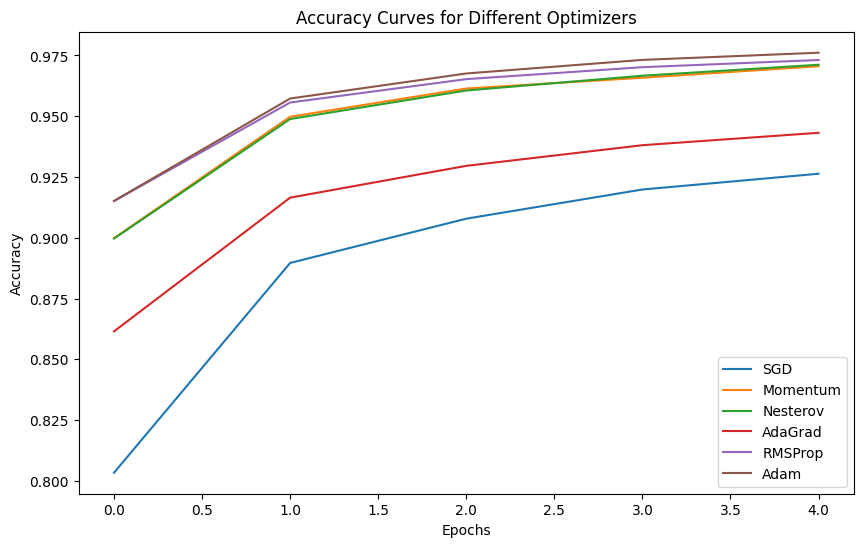

In [ ]:
# @title Exp:3. Illustrate the performance of various Optimization techniques of Gradient Descent(GD), Momentum Based GD, Nesterov Accelerated GD, Stochastic GD, AdaGrad, RMSProp, Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a function to create and compile a model
def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

# Initialize a dictionary to store accuracy history for each optimizer
accuracy_history = {}

# Train and evaluate models with different optimizers
num_epochs = 5

for optimizer_name, optimizer in optimizers.items():
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))
    accuracy_history[optimizer_name] = history.history['accuracy']

# Plot accuracy curves for each optimizer
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_values in accuracy_history.items():
    plt.plot(accuracy_values, label=optimizer_name)

plt.title('Accuracy Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()